In [ ]:
!pip install pytorch-lightning
!pip install pytorch-ignite


     |████████████████████████████████| 849kB 15.8MB/s 
     |████████████████████████████████| 112kB 50.3MB/s 
     |████████████████████████████████| 184kB 32.6MB/s 
     |████████████████████████████████| 829kB 52.4MB/s 
     |████████████████████████████████| 276kB 48.6MB/s 
     |████████████████████████████████| 1.3MB 48.7MB/s 
     |████████████████████████████████| 143kB 52.9MB/s 
     |████████████████████████████████| 296kB 47.1MB/s 
  Created wheel for future: filename=future-0.18.2-cp37-none-any.whl size=491058 sha256=3b8bc01b1bad8d60c1c0894b6f3e6864154713e7631c5715c8795a4e38eff9d0
  Stored in directory: /root/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44620 sha256=b90fb22bcd6d2bb2449da79bf66c81e4fae9dc7ce8fa0a1212f59bdc144c89c5
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
Successfully built futur

In [3]:
# Mont Google Drive
from google.colab import drive
drive.mount('/content/gdrive')
% cd /content/gdrive/MyDrive/Research/'Fault-Tolerant Neural Networks'/'Ensemble Methods'

Mounted at /content/gdrive
/content/gdrive/MyDrive/Research/Fault-Tolerant Neural Networks/Ensemble Methods


In [ ]:
# auto reload
%load_ext autoreload
%autoreload 2

In [ ]:
# Clone the Pytorch CIFAR10 Models Repo and download pre-trained models 
# This code is only needed to be run once since the storage is mounted to Google
# Cloud

# ! git clone https://github.com/huyvnphan/PyTorch_CIFAR10.git
# % cd PyTorch_CIFAR10/
# !python train.py --download_weights 1
# % cd ..

In [1]:
import torch
import torchvision
from torch import nn
from tqdm.notebook import tqdm
import torchvision.transforms as transforms
import sys
sys.path.append('./PyTorch_CIFAR10')
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations

# Load the CIFAR Dataset

In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], 
                                                 std=[0.2471, 0.2435, 0.2616])]
)

# If the data set does not exist, then set download=true
cifar_test = torchvision.datasets.CIFAR10(root='./data', train=False, 
                                          download=False, transform = transform)
cifar_test_loader = torch.utils.data.DataLoader(cifar_test, batch_size=32, 
                                                shuffle=True)

cifar_train = torchvision.datasets.CIFAR10(root='./data', train=True, 
                                           download=False, transform = transform)

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 
          'horse', 'ship', 'truck']

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [5]:
cifar_train[0]

(tensor([[[-1.0523e+00, -1.3062e+00, -1.1952e+00,  ...,  5.1885e-01,
            4.2363e-01,  3.6015e-01],
          [-1.7347e+00, -1.9887e+00, -1.7030e+00,  ..., -3.6613e-02,
           -1.0009e-01, -5.2483e-02],
          [-1.5919e+00, -1.7347e+00, -1.2110e+00,  ..., -1.1596e-01,
           -8.4224e-02, -2.5880e-01],
          ...,
          [ 1.3124e+00,  1.2013e+00,  1.1537e+00,  ...,  5.5059e-01,
           -1.0999e+00, -1.1475e+00],
          [ 8.6800e-01,  7.5691e-01,  9.6322e-01,  ...,  9.3148e-01,
           -4.4924e-01, -6.7143e-01],
          [ 8.2039e-01,  6.7755e-01,  8.5213e-01,  ...,  1.4393e+00,
            4.0776e-01, -3.6613e-02]],
 
         [[-9.8178e-01, -1.2395e+00, -1.2072e+00,  ...,  1.4557e-01,
            3.2838e-02,  1.6733e-02],
          [-1.6582e+00, -1.9803e+00, -1.8514e+00,  ..., -5.6305e-01,
           -6.4357e-01, -5.7915e-01],
          [-1.5938e+00, -1.8676e+00, -1.5455e+00,  ..., -6.2747e-01,
           -6.2747e-01, -8.0462e-01],
          ...,
    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


8


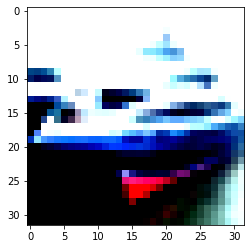

In [ ]:
plt.imshow(cifar_test[1][0].numpy().transpose([1, 2, 0]))
print(cifar_test[1][1])


# Check the models trained with the same training data

In [ ]:
from utils import eval_acc
# def eval_acc(model, test_loader, device):
#     correct = 0
#     total = 0
#     for i, data in enumerate(tqdm(test_loader, desc=f'evaluating:')):
#         inputs, labels = data[0].to(device), data[1].to(device)
#         outputs = model(inputs)
#         _, predicted = torch.max(outputs, 1)
#         correct += (predicted == labels).sum().item()
#         total += labels.size(0)
#     return correct / total

In [ ]:
from cifar10_models.vgg import vgg11_bn, vgg13_bn, vgg16_bn, vgg19_bn
from cifar10_models.densenet import densenet121, densenet161, densenet169
from cifar10_models.googlenet import googlenet
from cifar10_models.inception import inception_v3
from cifar10_models.mobilenetv2 import mobilenet_v2
from cifar10_models.resnet import resnet18, resnet34, resnet50

models = [vgg11_bn(pretrained=True), densenet121(pretrained=True), 
          googlenet(pretrained=True)] 
          # inception_v3(pretrained=True), 
          # mobilenet_v2(pretrained=True)]

In [ ]:
acc = []
for model in models:
    model.to(device)
    model.eval()
    acc.append(eval_acc(model, cifar_test_loader, device))

For majority voting machanism on the output. It takes at least three incorrect answers to shadows the correct answer. Thus, the upperbound is the probability of all of them are correct + 1 fail + 2 fails

In [ ]:
# Calculate the probablity that "nagates" nagative events happen
from utils import calculate_prob

In [ ]:
acc = [0.9167, 0.9094, 0.9125]
print(acc)

[0.9167, 0.9094, 0.9125]


In [ ]:
calculate_prob(acc, 0) + calculate_prob(acc, 1) # + calculate_prob(acc, 2) + calculate_prob(acc, 3)

0.9785574915

## Create the voting network

In [ ]:
from models import VotingNet
majorityVote = VotingNet(models, 10)
eval_acc(majorityVote, cifar_test_loader, device)

# Train With Same Data

In [ ]:
import torch.utils.data as data
from ignite.engine import Events, create_supervised_trainer, create_supervised_evaluator
from ignite.metrics import Accuracy, Loss
from ignite.handlers import EarlyStopping
from ignite.contrib.handlers.tqdm_logger import ProgressBar
from pathlib import Path
import torch.optim as optim

In [ ]:
from utils import split_data_set, get_data_loaders, train_model, save_models
# Create new train, test and validation data loader
cifar_combined = torch.utils.data.ConcatDataset((cifar_train, cifar_test))
seeds = [20210325, 3141592652, 220152302]

In [ ]:
for i in range(3):
    seed = seeds[i]
    cifar_train, cifar_test = split_data_set(cifar_combined, [51000, 9000], 
                                             seed)
    cifar_train_sets = split_data_set(cifar_train, [17000] * 3, seed)

    # The Models
    models = [vgg11_bn(), densenet121(), googlenet()]
    models[0].name = 'vgg11_bn'
    models[1].name = 'densenet121'
    models[2].name = 'googlenet'
    train_loader, val_loader = get_data_loaders(cifar_train_sets[0], 32, 32, 
                                                    0.1)
    for j in range(len(models)):
        models[j].train()
        models[j].to(device)
        train_model(models[j], train_loader, 
                    val_loader, 30, nn.CrossEntropyLoss(), 
                    optim.Adam(models[j].parameters()), device)
        
    save_models(models, Path(f'./same_data_models/models_{i}_seed_{seed}'))
    cifar_test_loader = data.DataLoader(cifar_test, batch_size=32)
    acc = []
    for model in models:
        model.eval()
        acc.append(eval_acc(model, cifar_test_loader, device))
    print(acc)
    print(f'Theoretical Upper Bound:\
            {calculate_prob(acc, 0) + calculate_prob(acc, 1)}')
    majorityVote = VotingNet(models, 10)
    print(f'Actual Value {eval_acc(majorityVote, cifar_test_loader, device)}')

# Training With Different Data

In [ ]:
from utils import split_data_set, get_data_loaders, train_model, save_models
# Create new train, test and validation data loader
cifar_combined = torch.utils.data.ConcatDataset((cifar_train, cifar_test))
seeds = [20210325, 3141592652, 220152302]

In [ ]:
for i in range(3):
    cifar_train, cifar_test = split_data_set(cifar_combined, [51000, 9000], 
                                             seeds[i])
    cifar_train_sets = split_data_set(cifar_train, [17000] * 3, seeds[i])

    # The Models
    models = [vgg11_bn(), densenet121(), googlenet()]
    models[0].name = 'vgg11_bn'
    models[1].name = 'densenet121'
    models[2].name = 'googlenet'

    for j in range(len(models)):
        models[j].train()
        models[j].to(device)
        train_loader, val_loader = get_data_loaders(cifar_train_sets[j], 32, 32, 
                                                    0.1, seeds[j])
        train_model(models[j], train_loader, 
                    val_loader, 30, nn.CrossEntropyLoss(), 
                    optim.Adam(models[j].parameters()), device)
        
    save_models(models, Path(f'./different_data_models/models_{i}_seed_{seeds[i]}'))
    cifar_test_loader = data.DataLoader(cifar_test, batch_size=32)
    acc = []
    for model in models:
        model.eval()
        acc.append(eval_acc(model, cifar_test_loader, device))
    print(acc)
    print(f'Theoretical Upper Bound:\
            {calculate_prob(acc, 0) + calculate_prob(acc, 1)}')
    majorityVote = VotingNet(models, 10)
    print(f'Actual Value {eval_acc(majorityVote, cifar_test_loader, device)}')

# Confusion Matrix

In [ ]:
from utils import load_models

# load data
index = 0
models = [vgg11_bn(), densenet121(), googlenet()]
models[0].name = 'vgg11_bn'
models[1].name = 'densenet121'
models[2].name = 'googlenet'
load_models(models, Path(f'./different_data_models/models_{index}_seed_{seeds[index]}'))

_, cifar_test = split_data_set(cifar_combined, [51000, 9000], seeds[index])
cifar_test_loader = data.DataLoader(cifar_test, batch_size=32)
acc = []
for model in models:
    model.to(device)
    model.eval()
    acc.append(eval_acc(model, cifar_test_loader, device))
print(acc)
print(f'Theoretical Upper Bound:\
        {calculate_prob(acc, 0) + calculate_prob(acc, 1)}')
majorityVote = VotingNet(models, 10)
print(f'Actual Value {eval_acc(majorityVote, cifar_test_loader, device)}')


[0.6943333333333334, 0.748, 0.7226666666666667]
Theoretical Upper Bound:        0.8110373084444444



Actual Value 0.7735555555555556


In [ ]:
from utils import load_models

# load data
index = 2
models = [vgg11_bn(), densenet121(), googlenet()]
models[0].name = 'vgg11_bn'
models[1].name = 'densenet121'
models[2].name = 'googlenet'
load_models(models, Path(f'./same_data_models/models_{index}_seed_{seeds[index]}'))

_, cifar_test = split_data_set(cifar_combined, [51000, 9000], seeds[index])
cifar_test_loader = data.DataLoader(cifar_test, batch_size=32)
acc = []
for model in models:
    model.to(device)
    model.eval()
    acc.append(eval_acc(model, cifar_test_loader, device))
print(acc)
print(f'Theoretical Upper Bound:\
        {calculate_prob(acc, 0) + calculate_prob(acc, 1)}')
majorityVote = VotingNet(models, 10)
print(f'Actual Value {eval_acc(majorityVote, cifar_test_loader, device)}')


[0.7225555555555555, 0.7562222222222222, 0.7137777777777777]
Theoretical Upper Bound:        0.8218969870178325



Actual Value 0.7803333333333333


In [ ]:
from ignite.metrics import ConfusionMatrix
# check the confusion matrix
matrices = []

for model in models:   
    metrics = {
        "confusion_matrix": ConfusionMatrix(10, device=device)
    }

    evaluator = create_supervised_evaluator(model, metrics=metrics, device=device)
    state = evaluator.run(cifar_test_loader)
    matrices.append(state.metrics['confusion_matrix'])

In [ ]:
for i in range(3):
    print(matrices[i])

tensor([[676,  19,  49,  31,  10,   5,   3,  21,  76,  11],
        [ 11, 867,   4,   5,   1,   2,   8,   7,  24,   3],
        [ 44,   2, 576,  93,  42,  48,  14,  53,  13,   1],
        [ 25,   2,  59, 511,  29, 197,  13,  63,   9,   4],
        [ 13,   2,  72, 114, 516,  44,  12,  91,   9,   0],
        [  6,   1,  42, 132,  21, 629,   2,  71,   5,   0],
        [  1,   5,  70, 243,  21,  28, 493,   9,   8,   0],
        [ 11,   3,  16,  27,  24,  55,   0, 737,   5,   4],
        [ 45,  29,  13,  15,   5,   3,   4,  15, 752,   8],
        [ 36, 268,   2,  43,   4,  13,   6,  33,  41, 492]], device='cuda:0')
tensor([[583,   5, 114,  24,  27,  15,   4,  10,  61,  58],
        [ 21, 679,  10,  28,   2,  26,   5,   1,  39, 121],
        [ 20,   1, 612,  65,  47,  84,  32,  13,   7,   5],
        [  6,   1,  38, 572,  21, 210,  27,  21,   8,   8],
        [ 11,   0,  53,  86, 611,  43,  18,  43,   6,   2],
        [  1,   0,  24, 116,  22, 711,   7,  24,   3,   1],
        [  9,   1,  46

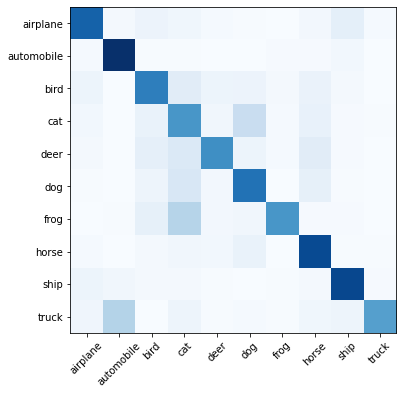

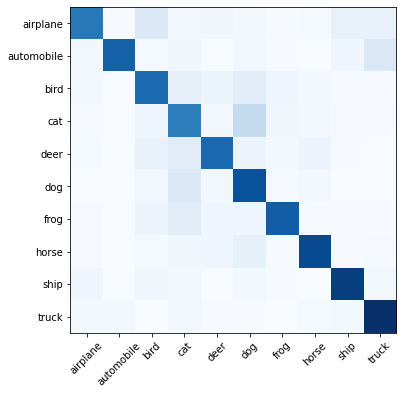

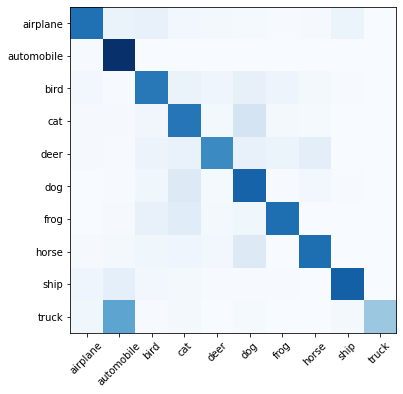

In [ ]:
# plot the metrics
for i in range(3):
    cmap = plt.get_cmap('Blues')
    cm = matrices[i].cpu().numpy()
    cm = cm.astype('float') / np.expand_dims(cm.sum(axis=1), axis=-1)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels, )

In [ ]:
cm.sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
batch_size = 256
cirfar_dataloader = torch.utils.data.DataLoader(cifar_train, batch_size=batch_size, shuffle=False, num_workers=2)
label_indexes = [[] for i in range(10)]

start = 0
for data in cirfar_dataloader:
    labels = data[1]
    for i, label in enumerate(labels):
        label_indexes[label].append(i + start)
    start += batch_size

label_indexes = [np.array(label_indexes[i]) for i in range(10)]

In [ ]:
random = np.random.RandomState(12345)
label_indexes[0]
indexes_1, indexes_2 = [], []
for indexes in label_indexes:
    random.shuffle(indexes)
    splits = np.split(indexes, 2)
    indexes_1.extend(splits[0])
    indexes_2.extend(splits[1])

dataset_1 = torch.utils.data.Subset(cifar_train, indexes_1)
dataset_2 = torch.utils.data.Subset(cifar_train, indexes_2)

In [ ]:
np.array_equal(indexes_1, indexes_2)

False

In [ ]:
indexes_test

[28363,
 47140,
 8934,
 4918,
 40618,
 2780,
 22724,
 15590,
 46782,
 5432,
 16420,
 17865,
 7631,
 45423,
 38576,
 5441,
 11100,
 38770,
 27104,
 23825,
 28794,
 47048,
 48318,
 21413,
 28681,
 12073,
 1249,
 39519,
 4141,
 9124,
 24713,
 2423,
 28966,
 20759,
 40740,
 39670,
 26342,
 29980,
 36750,
 1740,
 28733,
 35446,
 26840,
 9062,
 46750,
 16952,
 17154,
 1664,
 10764,
 33414,
 17762,
 44470,
 9057,
 25714,
 35196,
 1168,
 31593,
 48428,
 14698,
 4683,
 48788,
 3880,
 5828,
 25460,
 4468,
 27042,
 4314,
 19386,
 3815,
 17947,
 18763,
 8132,
 18706,
 25251,
 11563,
 10008,
 25431,
 24622,
 42569,
 4746,
 11237,
 39914,
 25797,
 32091,
 352,
 15886,
 27147,
 5130,
 23791,
 43708,
 49344,
 21531,
 36163,
 37066,
 10323,
 6833,
 2446,
 31987,
 233,
 18737,
 15851,
 8044,
 30645,
 37955,
 48851,
 30440,
 15352,
 5614,
 11944,
 17422,
 45096,
 44568,
 25191,
 5324,
 32479,
 28000,
 48254,
 38000,
 9813,
 46763,
 15309,
 2946,
 30820,
 23629,
 4061,
 34040,
 8268,
 22238,
 6112,
 28208

# Meta-Learner

In [ ]:
import torch
from pytorch_lightning import Trainer
import pytorch_lightning as pl
import torch.nn.functional as F
import torchvision.transforms as T
from torch.optim import Adam
from torch.nn import CrossEntropyLoss
from data import CIFAR10Data
from module import CIFAR10Module
from torchvision.datasets import CIFAR10
import copy
from torch.utils.data import DataLoader
from sklearn.linear_model import LogisticRegression
from pytorch_lightning.metrics import Accuracy
from schduler import WarmupCosineLR
from sklearn.metrics import classification_report

In [ ]:
model_artifacts = [
    'cifar10/densenet121/version_0/checkpoints/model.ckpt',
    'cifar10/resnet18/version_0/checkpoints/model.ckpt',
    'cifar10/vgg11_bn/version_0/checkpoints/model.ckpt'
]

models = []

for model_artifact in model_artifacts:
    models.append(copy.deepcopy(CIFAR10Module.load_from_checkpoint(model_artifact).model))

In [ ]:
class WeightedVoting(pl.LightningModule):
    def __init__(self, models, output_dim):
        super().__init__()
        self.model = nn.Linear(len(models) * output_dim, output_dim)
        self.models = models
        self.criterion = torch.nn.CrossEntropyLoss()
        self.accuracy = Accuracy()

    def forward(self, X):
        X = torch.hstack([F.softmax(self.models[i](X), dim=1).detach() for i in range(len(self.models))])
        X = self.model(X)
        return X

    def training_step(self, batch, batch_nb):
        X, y = batch
        preds = self.forward(X)
        loss = self.criterion(preds, y)
        accuracy = self.accuracy(torch.argmax(preds, dim=1), y)
        self.log("loss/train", loss)
        self.log("acc/train", accuracy)
        return loss

    def validation_step(self, batch, batch_nb):
        X, y = batch
        preds = self.forward(X)
        loss = self.criterion(preds, y)
        accuracy = self.accuracy(torch.argmax(preds, dim=1), y)
        self.log("loss/train", loss)
        self.log("acc/train", accuracy)
        return accuracy

    def test_step(self, batch, batch_nb):
        X, y = batch
        preds = self.forward(X)
        loss = self.criterion(preds, y)
        accuracy = self.accuracy(torch.argmax(preds, dim=1), y)
        self.log("acc/train", accuracy)
        return accuracy

    def configure_optimizers(self):
        optimizer = torch.optim.SGD(
            self.model.parameters(),
            lr=0.01,
            weight_decay=0.01,
            momentum=0.9,
            nesterov=True,
        )
        total_steps = 10 * len(self.train_dataloader())
        scheduler = {
            "scheduler": WarmupCosineLR(
                optimizer, warmup_epochs=total_steps * 0.3, max_epochs=total_steps
            ),
            "interval": "step",
            "name": "learning_rate",
        }
        return [optimizer], [scheduler]

In [ ]:
class CIFAR10DataModule(pl.LightningDataModule):
    def __init__(self):
        super().__init__()
        self.mean = (0.4914, 0.4822, 0.4465)
        self.std = (0.2471, 0.2435, 0.2616)

    def train_dataloader(self):
        transform = T.Compose(
            [
                T.RandomCrop(32, padding=4),
                T.RandomHorizontalFlip(),
                T.ToTensor(),
                T.Normalize(self.mean, self.std),
            ]
        )
        dataset = CIFAR10(root='./data', train=True, transform=transform)
        dataloader = DataLoader(
            dataset,
            batch_size=32,
            num_workers=2,
            shuffle=True,
            drop_last=True,
            pin_memory=True,
        )
        return dataloader

    def val_dataloader(self):
        transform = T.Compose(
            [
                T.ToTensor(),
                T.Normalize(self.mean, self.std),
            ]
        )
        dataset = CIFAR10(root='./data', train=False, transform=transform)
        dataloader = DataLoader(
            dataset,
            batch_size=32,
            num_workers=2,
            drop_last=False,
            pin_memory=True,
        )
        return dataloader

    def test_dataloader(self):
        return self.val_dataloader()

In [ ]:
for model in models:
    model.to(device)
    model.eval()

trainer = Trainer(
    fast_dev_run=False,
    logger=None,
    gpus=-1,
    deterministic=True,
    weights_summary=None,
    log_every_n_steps=1,
    max_epochs=10,
    checkpoint_callback=None,
    precision=32,
)

model = WeightedVoting(models, 10)
data = CIFAR10DataModule()
trainer.fit(model, data)
trainer.test(model, data.test_dataloader())

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'acc/train': 0.9340000152587891}
--------------------------------------------------------------------------------


[{'acc/train': 0.9340000152587891}]

In [ ]:
X_train = np.vstack(X)
y_train = np.hstack(y)

(50000,)

In [ ]:
X = []
y = []
for data in tqdm(cifar_test_loader):
    images, labels = data[0].to(device), data[1].to(device)
    X.append(np.hstack([F.softmax(models[i](images), dim=1).cpu().detach().numpy() for i in range(3)]))
    y.append(labels.cpu().detach().numpy())

In [ ]:
X_test = np.vstack(X)
y_test = np.hstack(y)

In [ ]:
clf = LogisticRegression(C=0.001, multi_class='multinomial')
clf.fit(X_train, y_train)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print(classification_report(clf.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       992
           1       0.94      0.95      0.95       999
           2       0.88      0.91      0.89       960
           3       0.83      0.82      0.82      1022
           4       0.92      0.92      0.92       999
           5       0.86      0.87      0.87       994
           6       0.93      0.95      0.94       981
           7       0.95      0.93      0.94      1022
           8       0.94      0.94      0.94       999
           9       0.94      0.91      0.92      1032

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [ ]:
print(classification_report(clf.predict(X_train), y_train))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4994
           1       0.99      0.99      0.99      4989
           2       0.98      0.99      0.98      4966
           3       0.98      0.96      0.97      5073
           4       0.98      0.99      0.98      4969
           5       0.98      0.98      0.98      4989
           6       0.98      0.99      0.98      4975
           7       0.99      0.98      0.99      5022
           8       0.98      0.99      0.99      4982
           9       0.99      0.98      0.98      5041

    accuracy                           0.98     50000
   macro avg       0.98      0.98      0.98     50000
weighted avg       0.98      0.98      0.98     50000

